<a href="https://colab.research.google.com/github/Redwoods/Arduino/blob/master/ar-iot/py-pandas/iot_nano33imu_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The IMU data are composed of nine time series; acceleration, gyroscope, and magnetic field.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation, rc

## [실시간 데이터 로드]
- loading real-time json file from MongoDB via web

- http://life21c.inje.ac.kr:3030/client_33imu_gauge.html

In [ ]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


In [ ]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,6387f6a12d6cf8514669c507,2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73,0
1,6387f6a22d6cf8514669c509,2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97,0
2,6387f6a22d6cf8514669c50b,2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67,0
3,6387f6a32d6cf8514669c50d,2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63,0
4,6387f6a32d6cf8514669c50f,2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25,0


In [ ]:
df.tail()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
39560,6399c5db08fb85aa880a33d1,2022-12-14 21:47:23.088,0.03,-0.01,0.99,-0.37,-3.91,-0.43,-19.91,22.81,-40.10,0
39561,6399c5db08fb85aa880a33d3,2022-12-14 21:47:23.597,0.03,-0.01,0.99,-0.37,-3.85,-0.55,-19.43,22.99,-40.10,0
39562,6399c5dc08fb85aa880a33d5,2022-12-14 21:47:24.106,0.03,-0.01,0.99,-0.43,-3.85,-0.49,-19.23,22.85,-41.36,0
39563,6399c5dc08fb85aa880a33d7,2022-12-14 21:47:24.615,0.03,-0.01,0.99,-0.24,-3.97,-0.31,-19.24,22.30,-40.58,0
39564,6399c5dd08fb85aa880a33d9,2022-12-14 21:47:25.124,0.03,-0.01,0.99,-0.31,-3.97,-0.43,-19.13,22.62,-40.98,0


In [ ]:
df.shape, type(df)

((39565, 12), pandas.core.frame.DataFrame)

In [ ]:
df['date'][:1],df['date'][-1:]

(0   2022-12-01 09:34:41.583
 Name: date, dtype: datetime64[ns], 39564   2022-12-14 21:47:25.124
 Name: date, dtype: datetime64[ns])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39565 entries, 0 to 39564
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   _id      39565 non-null  object        
 1   date     39565 non-null  datetime64[ns]
 2   accel_x  39565 non-null  float64       
 3   accel_y  39565 non-null  float64       
 4   accel_z  39565 non-null  float64       
 5   gyro_x   39565 non-null  float64       
 6   gyro_y   39565 non-null  float64       
 7   gyro_z   39565 non-null  float64       
 8   mag_x    39565 non-null  float64       
 9   mag_y    39565 non-null  float64       
 10  mag_z    39565 non-null  float64       
 11  __v      39565 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
count,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.0
mean,0.025349,-0.006836,0.986553,-0.307091,-3.787223,-0.348654,-10.616948,1.716596,-40.236004,0.0
std,0.037327,0.050886,0.067234,5.260644,7.765598,7.104641,7.862221,15.664196,1.695420,0.0
min,-1.010000,-1.570000,-2.390000,-241.030000,-255.980000,-213.200000,-30.220000,-17.800000,-50.340000,0.0
25%,0.020000,-0.010000,0.990000,-0.430000,-3.910000,-0.430000,-19.290000,-11.230000,-40.760000,0.0
50%,0.020000,0.000000,0.990000,-0.370000,-3.850000,-0.370000,-4.570000,-10.520000,-40.310000,0.0
75%,0.030000,0.000000,0.990000,-0.310000,-3.720000,-0.310000,-4.040000,22.140000,-39.860000,0.0
max,1.450000,0.900000,2.020000,353.640000,348.080000,325.010000,34.030000,43.590000,26.290000,0.0


## Check data
- NaN
- missing value

In [ ]:
df.isnull().sum() #/df.shape[0]*100

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

In [ ]:
df.isna().sum()

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> mean, 33.3 (100/3)

In [ ]:
# df=df.fillna(33.3)
# df.isna().sum()

## IoT data were cleaned!

In [ ]:
# Save cleaned iot data in csv file.
df.to_csv('iot33imu_data_cleaned_221215_raw.csv')

In [ ]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,6387f6a12d6cf8514669c507,2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73,0
1,6387f6a22d6cf8514669c509,2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97,0
2,6387f6a22d6cf8514669c50b,2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67,0
3,6387f6a32d6cf8514669c50d,2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63,0
4,6387f6a32d6cf8514669c50f,2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25,0


## New DataFrame : iot_data
### Dataframe with date and ax,ay,az,gx,gy,gz,mx,my,mz

### [DIY-1] 

In [ ]:
#  [DIY-1] select columns
cols = ['date',  ]

In [ ]:
# Make iot data
iot_data = df[cols]

In [ ]:
iot_data.shape

(39565, 10)

In [ ]:
iot_data.head()  # date와 9 개의 신호를 확인.

,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73
1,2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97
2,2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67
3,2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63
4,2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25


In [ ]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39565 entries, 0 to 39564
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     39565 non-null  datetime64[ns]
 1   accel_x  39565 non-null  float64       
 2   accel_y  39565 non-null  float64       
 3   accel_z  39565 non-null  float64       
 4   gyro_x   39565 non-null  float64       
 5   gyro_y   39565 non-null  float64       
 6   gyro_z   39565 non-null  float64       
 7   mag_x    39565 non-null  float64       
 8   mag_y    39565 non-null  float64       
 9   mag_z    39565 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 3.0 MB


In [ ]:
iot_data.isna().sum()

date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
dtype: int64

In [ ]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33imu_221215.csv')

## EDA (Exploratory Data Analysis, 탐색적 자료 분석) 

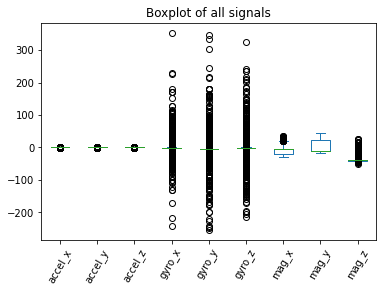

In [ ]:
# Plot boxplot
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

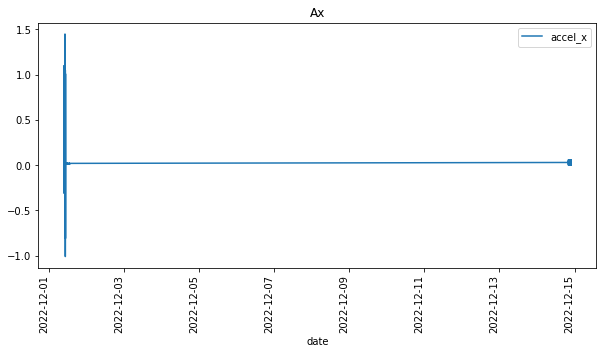

In [ ]:
iot_data.plot(x='date', y='accel_x', figsize=(10,5), title='Ax')
plt.xticks(rotation=90)
plt.show()

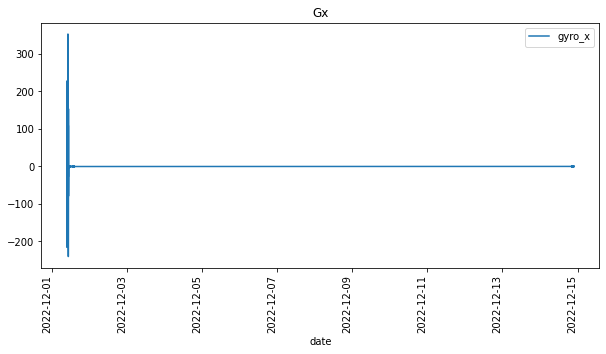

In [ ]:
iot_data.plot(x='date', y='gyro_x', figsize=(10,5), title='Gx')
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

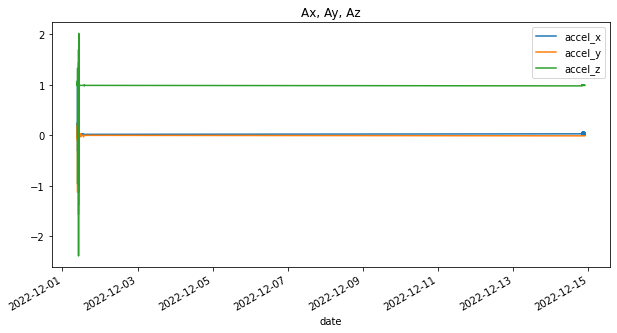

In [ ]:
# 3축 가속도를 아래에 그리시오.
iot_data.plot(x='date', y=['accel_x','accel_y','accel_z'], figsize=(10,5), title='Ax, Ay, Az')

### [DIY-2] 

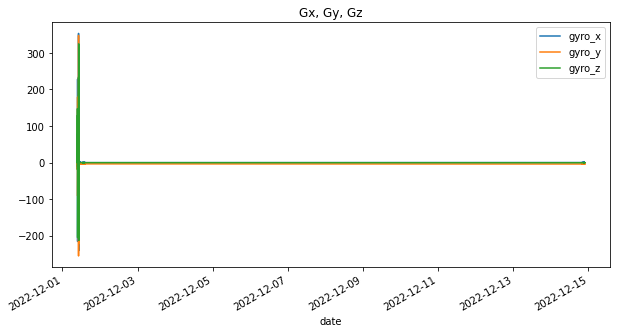

In [ ]:
# 3축 자이로 신호를 아래에 그리시오.
iot_data.plot(x='date', y , figsize=(10,5), title='Gx, Gy, Gz')

### [DIY-3] 

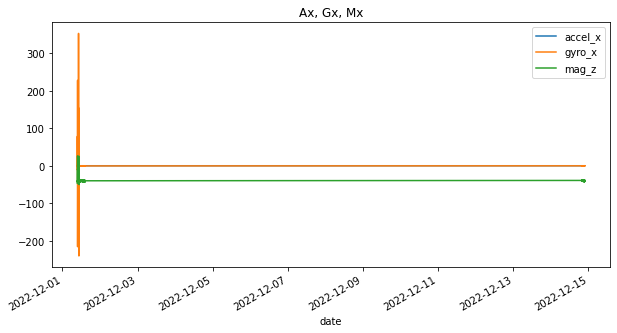

In [ ]:
# Ax, Gx,Mx 신호를 아래에 그리시오.
iot_data.plot(x='date', y , figsize=(10,5), title='Ax, Gx, Mx')

### Plot the mean of sensor data
### [DIY-4] 아래 코드를 참조해서 Az,Gz,Mz의 평균을 구하고 막대 그래프로 그리시오.

In [ ]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    26.727924
humidity       29.272309
luminosity     88.955534
dtype: float64

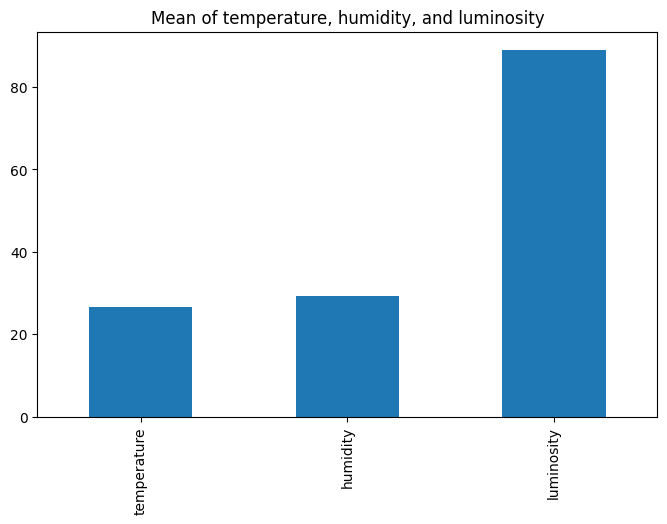

In [ ]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, $\cdots$

In [ ]:
iot_data.head()

,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73
1,2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97
2,2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67
3,2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63
4,2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25


#### Set date as index of timestamp

In [ ]:
iot_data.set_index('date',inplace=True)

In [ ]:
iot_data.head()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73
2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97
2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67
2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63
2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25


In [ ]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39565 entries, 2022-12-01 09:34:41.583000 to 2022-12-14 21:47:25.124000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  39565 non-null  float64
 1   accel_y  39565 non-null  float64
 2   accel_z  39565 non-null  float64
 3   gyro_x   39565 non-null  float64
 4   gyro_y   39565 non-null  float64
 5   gyro_z   39565 non-null  float64
 6   mag_x    39565 non-null  float64
 7   mag_y    39565 non-null  float64
 8   mag_z    39565 non-null  float64
dtypes: float64(9)
memory usage: 3.0 MB


In [ ]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [ ]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39565 entries, 2022-12-01 09:34:41.583000 to 2022-12-14 21:47:25.124000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  39565 non-null  float64
 1   accel_y  39565 non-null  float64
 2   accel_z  39565 non-null  float64
 3   gyro_x   39565 non-null  float64
 4   gyro_y   39565 non-null  float64
 5   gyro_z   39565 non-null  float64
 6   mag_x    39565 non-null  float64
 7   mag_y    39565 non-null  float64
 8   mag_z    39565 non-null  float64
dtypes: float64(9)
memory usage: 3.0 MB


In [ ]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-01 09:34:00,0.030000,-0.010000,0.990000,-0.343243,-3.678919,-0.245135,-3.350541,-11.338108,-44.458378
2022-12-01 09:35:00,0.034051,-0.007975,0.991646,0.706962,-3.748734,2.790633,-5.630253,-7.770127,-44.015696
2022-12-01 09:36:00,0.030000,-0.010000,0.989048,-0.351429,-3.969524,-0.306667,-21.542381,14.250000,-40.706667
2022-12-01 09:37:00,0.030000,-0.010000,0.990000,-0.318305,-3.919661,-0.285339,-21.683220,14.094915,-40.948814
2022-12-01 09:38:00,0.030000,-0.010000,0.990000,-0.340000,-3.932288,-0.319746,-21.590763,14.022881,-40.549492
...,...,...,...,...,...,...,...,...,...
2022-12-14 21:43:00,0.030000,-0.010000,0.990000,-0.325593,-3.906186,-0.439068,-19.469153,22.660932,-40.136864
2022-12-14 21:44:00,0.029744,-0.010000,0.990000,-0.319145,-3.933761,-0.448462,-19.264274,22.637265,-39.913675
2022-12-14 21:45:00,0.030254,-0.010000,0.990000,-0.319576,-3.931441,-0.437034,-19.048729,22.602797,-40.102119


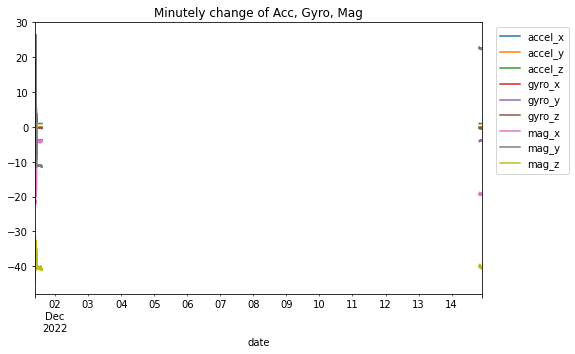

In [ ]:
#  Plot mean of the all iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of Acc, Gyro, Mag')
plt.legend(bbox_to_anchor=(1.02, 1.0))

### [DIY-5]  아래 코드를 참조해서 Ay,Gy,My의 2분 평균값의 변화를 보여 주는 그래프를 그리시오.

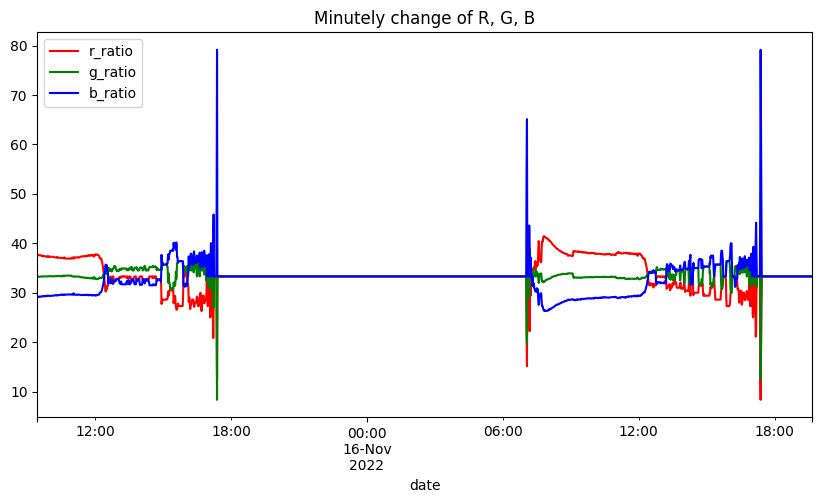

In [ ]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('60S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")

### 시간 평균 변화화

In [ ]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-01 09:00:00,0.033041,-0.013745,0.984660,-0.133014,-3.889613,-0.450188,-20.894789,17.072326,-40.653081
2022-12-01 10:00:00,0.030548,-0.018995,0.971100,-0.230052,-3.540655,-0.099009,-10.921533,-1.961242,-39.472359
2022-12-01 11:00:00,0.019688,0.000022,0.990000,-0.347678,-3.764490,-0.359796,-4.010734,-11.106479,-40.346888
2022-12-01 12:00:00,0.019940,0.000000,0.990000,-0.357716,-3.757453,-0.374005,-4.139647,-11.129482,-40.364207
2022-12-01 13:00:00,0.019996,-0.000004,0.990000,-0.343426,-3.743278,-0.370058,-4.236725,-11.116766,-40.475580
...,...,...,...,...,...,...,...,...,...
2022-12-14 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-14 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2022-12-01 09:00:00 to 2022-12-14 21:00:00
Freq: H
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  8 non-null      float64
 1   accel_y  8 non-null      float64
 2   accel_z  8 non-null      float64
 3   gyro_x   8 non-null      float64
 4   gyro_y   8 non-null      float64
 5   gyro_z   8 non-null      float64
 6   mag_x    8 non-null      float64
 7   mag_y    8 non-null      float64
 8   mag_z    8 non-null      float64
dtypes: float64(9)
memory usage: 25.4 KB


((325, 9), None)

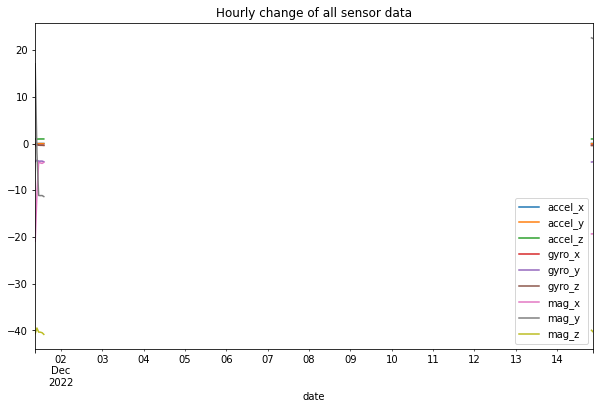

In [ ]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), '-o'
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

### [DIY-6]  아래 코드를 참조해서 Az,Gz,Mz의 1 시간 평균값의 변화를 보여 주는 그래프를 그리시오.

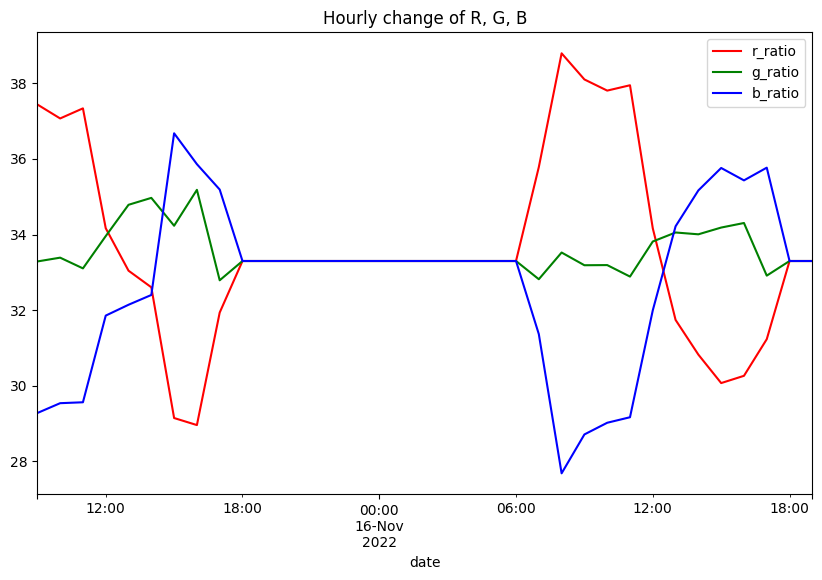

In [ ]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of Az, Gz, Mz')

### Good Job!  Have a great winter vacation!!!

----